# DATA VISUALIZATION AND DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data = pd.read_csv('SYMPTOMS.csv', usecols=['label','text'])
Data.head()

,label,text
0,Acne,I've been having a really bad rash on my skin ...
1,Acne,I've just developed a severe rash on my skin. ...
2,Acne,My skin has been breaking out in a terrible ra...
3,Acne,I've recently been experiencing a severe skin ...
4,Acne,I've been having a very unhealthy rash on my s...


In [4]:
Data.tail()

,label,text
1195,Varicose Veins,My legs' swelling has become worse over the la...
1196,Varicose Veins,Long durations of standing or walking have cau...
1197,Varicose Veins,My legs' skin around the veins is unusual. The...
1198,Varicose Veins,I am experiencing too many cramps in the last ...
1199,Varicose Veins,The veins in my calves are protruding out quit...


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Data['label'] = label_encoder.fit_transform(Data['label'])

<Axes: xlabel='label', ylabel='count'>

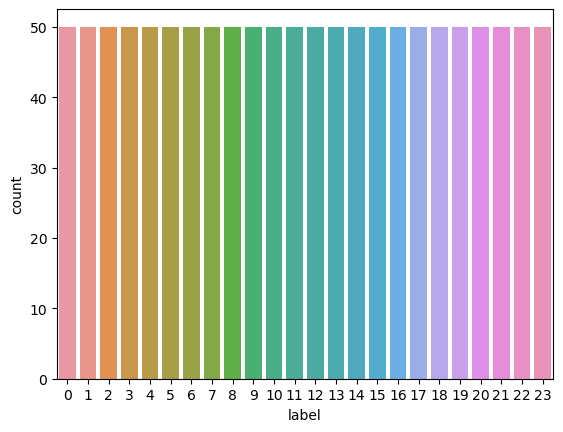

In [6]:
sns.countplot(x='label',data=Data)

(array([150., 100., 100., 150., 100., 100., 150., 100., 100., 150.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

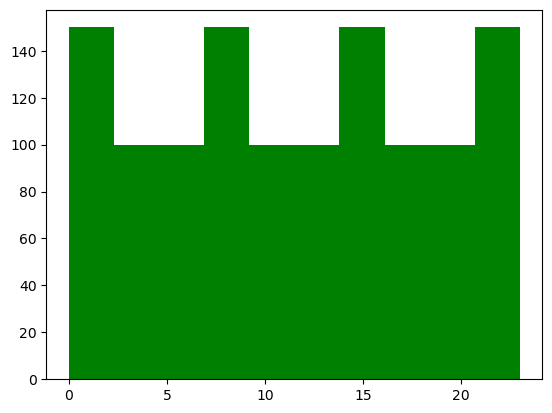

In [7]:
plt.hist(Data['label'],color='green')

<Axes: ylabel='Density'>

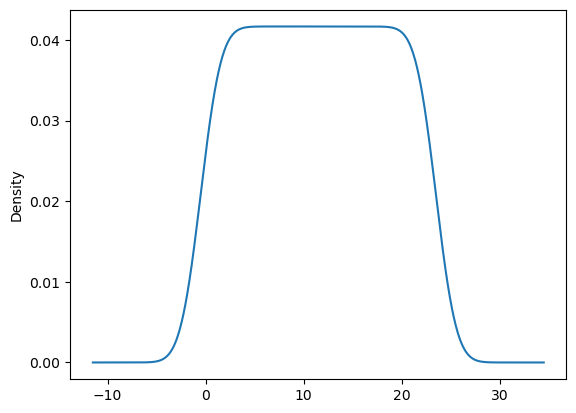

In [8]:
Data['label'].plot(kind='density')

C:\Users\Harika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


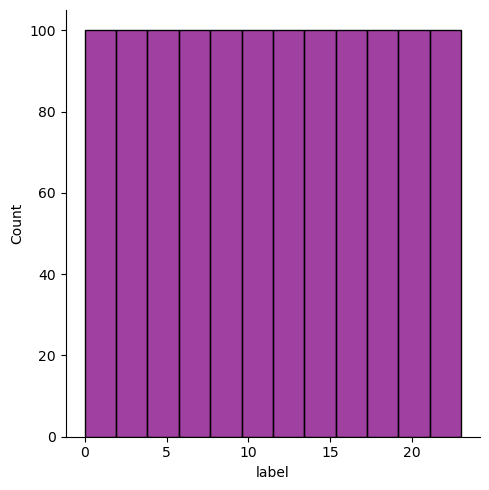

In [9]:
sns.displot(Data['label'], color='purple') 

<Axes: >

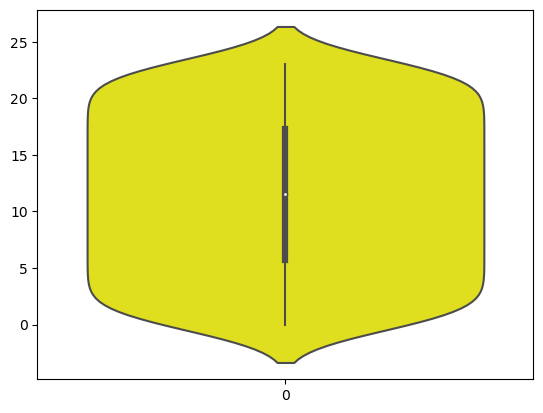

In [10]:
sns.violinplot(Data['label'], color='yellow') 

<Axes: xlabel='label', ylabel='Proportion'>

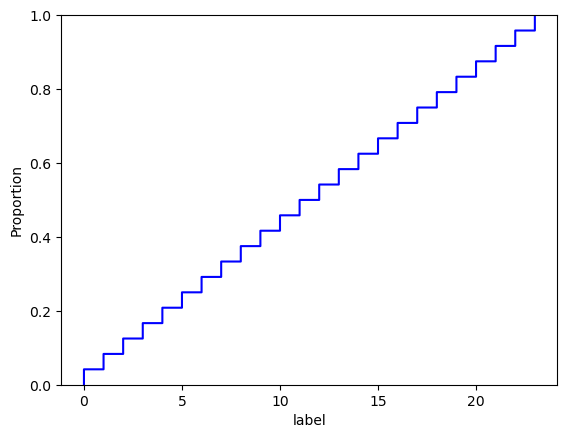

In [11]:
sns.ecdfplot(Data['label'], color='blue') 

C:\Users\Harika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


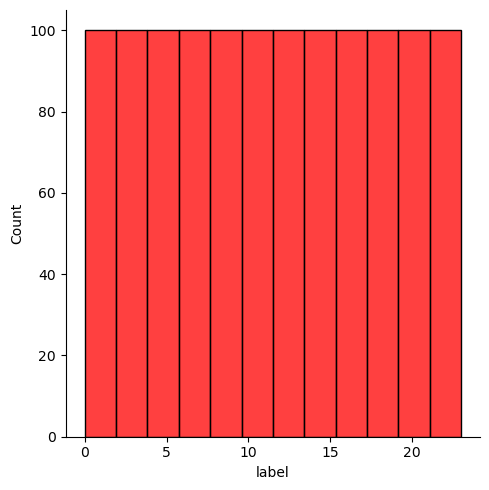

In [12]:
sns.displot(Data['label'], color='RED') 

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [14]:
# Define preprocess function for text preprocessing

def preprocess_text(text):
    
    # Check for NaN values and handle them
    
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    
    text = text.lower()
    
    # Remove special characters and digits
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and remove stop words
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in word_tokenize(text) if word not in stop_words]
    
    # Stemming
    
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

Data['text'] = Data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
from sklearn.model_selection import train_test_split

X,X_test,y,y_test = train_test_split(Data.loc[:,'text':],Data['label'],test_size=0.2)

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 799.5, 799.5, -0.5)

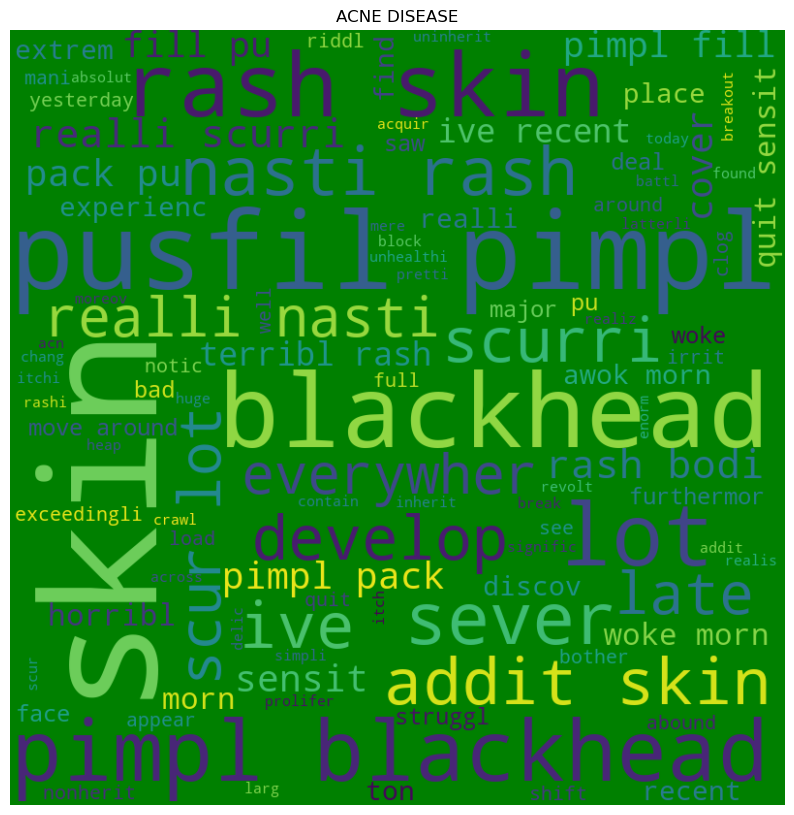

In [18]:
ACNE = ' '.join(Data.loc[Data['label'] == 0, 'text'].values)
ACNE_text = WordCloud(background_color='GREEN',max_words=2000,width = 800, height = 800).generate(ACNE)

plt.figure(figsize=[10,30])

plt.imshow(ACNE_text,interpolation='bilinear')
plt.title('ACNE DISEASE')
plt.axis('off')

Text(0.5, 1.0, 'ALLERGY')

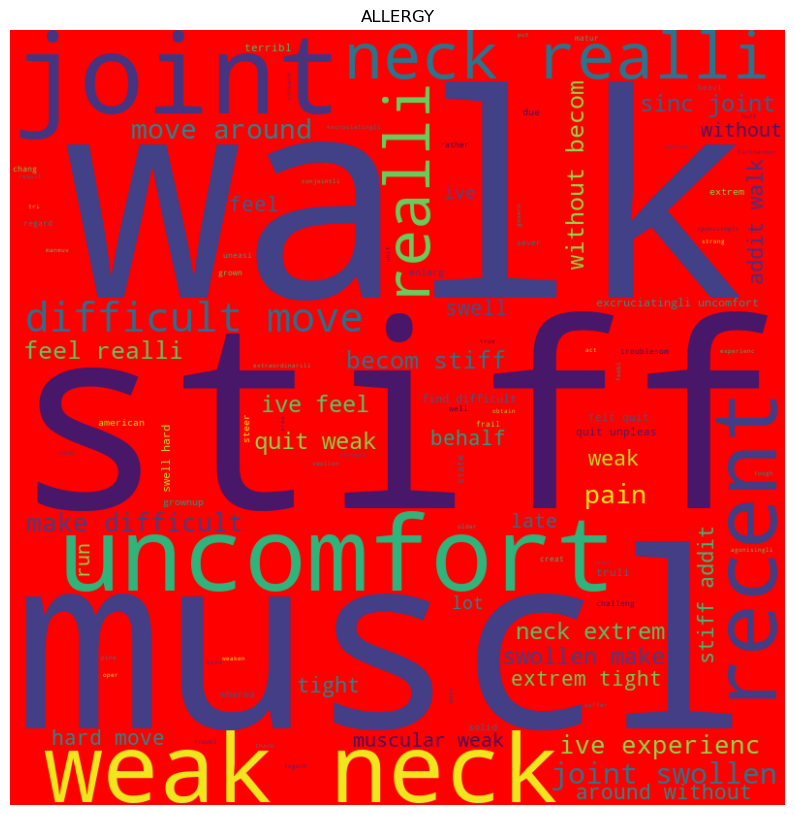

In [19]:
ALLERGY = ' '.join(Data.loc[Data['label'] == 1, 'text'].values)
ALLERGY_text = WordCloud(background_color='RED',max_words=2000,width = 800, height = 800).generate(ALLERGY)

plt.figure(figsize=[10,30])

plt.imshow(ALLERGY_text, interpolation='bilinear')
plt.axis('off')
plt.title('ALLERGY')

Text(0.5, 1.0, 'CHICKENPOX')

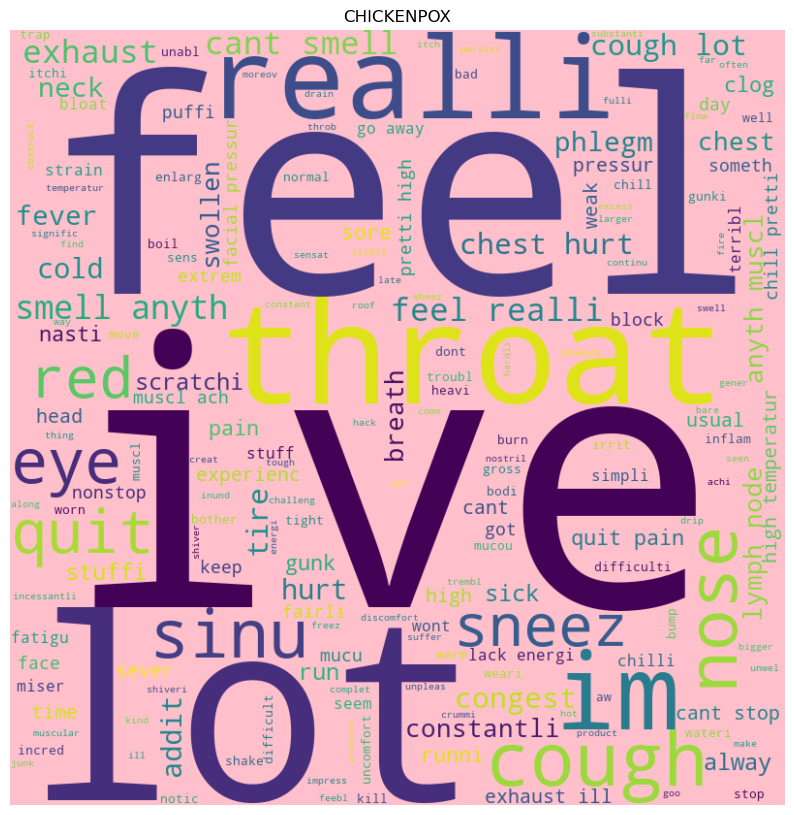

In [20]:
CHICKENPOX = ' '.join(Data.loc[Data['label'] == 5, 'text'].values)
CHICKENPOX_text = WordCloud(background_color='PINK',max_words=2000,width = 800, height = 800).generate(CHICKENPOX)

plt.figure(figsize=[10,30])

plt.imshow(CHICKENPOX_text, interpolation='bilinear')
plt.axis('off')
plt.title('CHICKENPOX')